## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel(r'C:\Users\campe\Documents\Economia do trabalho\australia_data_3.xlsx')  #, skiprows = range(0,8))

In [3]:
df.head()

,H5 LABOUR FORCE,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Title,Labour force,Participation rate,Part-time employment,Full-time employment,Employment,Year-ended employment growth,Year-ended employment trend growth,Employment to population ratio,Unemployment,Unemployment rate,Unemployment rate trend,Hours worked,Hours worked trend,Year-ended hours worked trend growth,Average hours worked trend,Job vacancies,Private sector job vacancies,Vacancies to labour force ratio
1,Description,Labour force persons,Labour force participation rate,Part-time employed persons,Full-time employed persons,Employed persons,Employed persons; Year-ended change (in per cent),Employed persons; Trend; Year-ended change (in...,Employed persons as percentage of working age ...,Unemployed persons,Unemployed persons as percentage of labour force,Unemployed persons as percentage of labour for...,Total hours worked per month,Total hours worked per month; Trend,Total hours worked per month; Trend; Year-ende...,Average hours worked per week,Number of job vacancies,Number of job vacancies in private sector,Job vacancies as percentage of labour force
2,Frequency,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Quarterly,Quarterly,Quarterly
3,Type,Seasonally adjusted,Seasonally adjusted,Seasonally adjusted,Seasonally adjusted,Seasonally adjusted,Seasonally adjusted,Trend,Seasonally adjusted,Seasonally adjusted,Seasonally adjusted,Trend,Seasonally adjusted,Trend,Trend,Trend,Seasonally adjusted,Seasonally adjusted,Seasonally adjusted
4,Units,'000,Per cent,'000,'000,'000,Per cent,Per cent,Per cent,'000,Per cent,Per cent,'000,'000,Per cent,Hours,'000,'000,Per cent


In [4]:
# Força de trabalho = somatório de pessoas ocupadas + pessoas desocupadas
# Taxa de participação na forca de trabalho = o número de pessoas na força de trabalho como porcentagem da população em idade ativa
# Empregos meio período
# Empregos full-time
# Crescimento do emprego no final do ano
# Nível da ocupação = ocupados/pea            ### employment to population ratio
# Desocupados = desempregados
# Taxa de desocupação = desocupados/pea       ### Employment to population ratio
# horas trabalhadas

df = df.filter(items=['H5 LABOUR FORCE', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',\
                     'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 12'])


colunas = ['Data','Força de Trabalho', 'Taxa de participação na forca de trabalho', 'Empregos meio período',\
           'Empregos full-time', 'Ocupados', 'Crescimento do emprego no final do ano', 'Nível de ocupação', 'Desocupados',\
          'Taxa de desocupação', 'Horas trabalhadas']

df.columns = colunas

In [5]:
df = df.drop(0)
df = df.drop(1)
df = df.drop(2)
df = df.drop(3)
df = df.drop(4)
df = df.drop(5)
df = df.drop(6)
df = df.drop(7)
df = df.drop(8)
df = df.drop(9)

In [6]:
df['Data'] = pd.to_datetime(df['Data']).dt.date

In [7]:
df.head()

,Data,Força de Trabalho,Taxa de participação na forca de trabalho,Empregos meio período,Empregos full-time,Ocupados,Crescimento do emprego no final do ano,Nível de ocupação,Desocupados,Taxa de desocupação,Horas trabalhadas
10,1978-02-28,6424.684455,61.249713,918.109313,5079.663419,5997.772733,NaN,57.179751,426.911723,6.644867,NaN
11,1978-03-31,6407.117449,60.969991,907.812517,5095.507289,6003.319806,NaN,57.127462,403.797643,6.302329,NaN
12,1978-04-30,6434.173335,61.169099,911.236012,5119.698162,6030.934174,NaN,57.335541,403.239161,6.267148,NaN
13,1978-05-31,6432.940039,61.087657,914.321352,5119.18666,6033.508013,NaN,57.294622,399.432026,6.209168,NaN
14,1978-06-30,6439.847886,61.079574,929.687346,5104.235886,6033.923232,NaN,57.229528,405.924654,6.303327,NaN


In [8]:
df['Força de Trabalho'] = df['Força de Trabalho'].astype(float)
df['Taxa de participação na forca de trabalho'] = df['Taxa de participação na forca de trabalho'].astype(float)
df['Empregos meio período'] = df['Empregos meio período'].astype(float)
df['Empregos full-time'] = df['Empregos full-time'].astype(float)
df['Crescimento do emprego no final do ano'] = df['Crescimento do emprego no final do ano'].astype(float)
df['Nível de ocupação'] = df['Nível de ocupação'].astype(float)
df['Desocupados'] = df['Desocupados'].astype(float)
df['Taxa de desocupação'] = df['Taxa de desocupação'].astype(float)
df['Horas trabalhadas'] = df['Horas trabalhadas'].astype(float)

In [9]:
df['Taxa de ocupação'] = df['Ocupados'] / df['Força de Trabalho'] * 100

In [10]:
df.head()

,Data,Força de Trabalho,Taxa de participação na forca de trabalho,Empregos meio período,Empregos full-time,Ocupados,Crescimento do emprego no final do ano,Nível de ocupação,Desocupados,Taxa de desocupação,Horas trabalhadas,Taxa de ocupação
10,1978-02-28,6424.684455,61.249713,918.109313,5079.663419,5997.772733,NaN,57.179751,426.911723,6.644867,NaN,93.355133
11,1978-03-31,6407.117449,60.969991,907.812517,5095.507289,6003.319806,NaN,57.127462,403.797643,6.302329,NaN,93.697671
12,1978-04-30,6434.173335,61.169099,911.236012,5119.698162,6030.934174,NaN,57.335541,403.239161,6.267148,NaN,93.732852
13,1978-05-31,6432.940039,61.087657,914.321352,5119.186660,6033.508013,NaN,57.294622,399.432026,6.209168,NaN,93.790832
14,1978-06-30,6439.847886,61.079574,929.687346,5104.235886,6033.923232,NaN,57.229528,405.924654,6.303327,NaN,93.696673


In [11]:
df.index = df['Data']
df = df.drop(columns=['Data'])

df = df.dropna()

In [12]:
df.head()

,Força de Trabalho,Taxa de participação na forca de trabalho,Empregos meio período,Empregos full-time,Ocupados,Crescimento do emprego no final do ano,Nível de ocupação,Desocupados,Taxa de desocupação,Horas trabalhadas,Taxa de ocupação
Data,,,,,,,,,,,
1979-02-28,6468.448188,60.675598,934.062909,5129.647848,6063.710757,1.099375,56.879063,404.737431,6.257103,916479.383457,93.742898
1979-03-31,6463.380116,60.519317,931.431431,5124.587184,6056.018615,0.877828,56.705022,407.361501,6.302608,918376.283042,93.697392
1979-04-30,6486.333560,60.664923,943.478317,5121.373875,6064.852192,0.562401,56.722921,421.481368,6.497991,926654.369373,93.502009
1979-05-31,6472.100685,60.450465,951.700312,5118.915877,6070.616189,0.615035,56.700535,401.484496,6.203310,927203.488552,93.79669
1979-06-30,6506.176151,60.667289,946.265106,5153.212139,6099.477245,1.086424,56.874997,406.698907,6.250967,948319.258431,93.749033


## Gráficos

<function matplotlib.pyplot.show(close=None, block=None)>

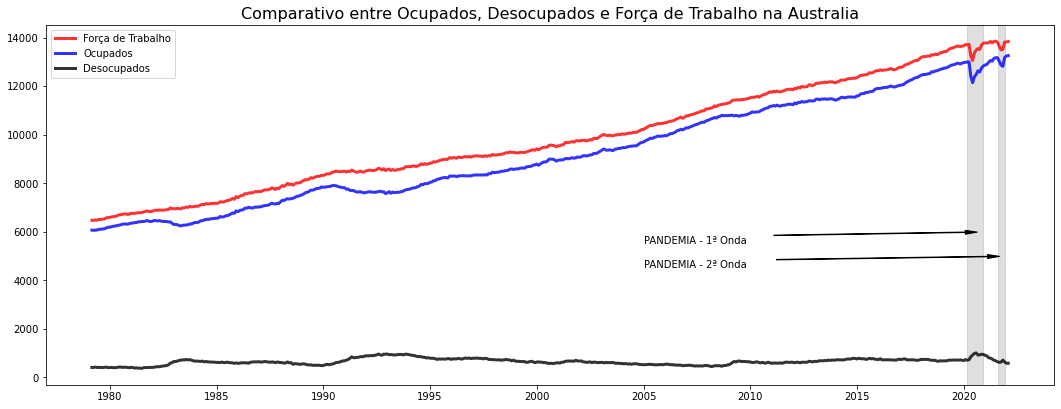

In [30]:
fig = plt.figure(figsize=(14, 5))
line_weight = 3
alpha = .8
ax1 = fig.add_axes([0, 0, 1, 1])
#ax2 = fig.add_axes()
#ax3 = fig.add_axes()

#ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(df['Força de Trabalho'], color='red', lw=line_weight, alpha=alpha, label='Força de Trabalho')
lns2 = ax1.plot(df['Ocupados'], color='blue', lw=line_weight, alpha=alpha, label='Ocupados')
lns3 = ax1.plot(df['Desocupados'], color='k', lw=line_weight, alpha=alpha, label='Desocupados')


plt.axvspan(pd.to_datetime('2020-03-01'),pd.to_datetime('2020-12-01'), color='gray', alpha=0.25)
plt.axvspan(pd.to_datetime('2021-08-01'),pd.to_datetime('2021-12-01'), color='gray', alpha=0.25)

# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETA 
ax1.annotate(
    "PANDEMIA - 1ª Onda", xy=(pd.to_datetime('2021-11-01'), 6000),
    xytext=(pd.to_datetime('2005-01-01'), 5500),
    arrowprops=arrow_properties)

# 2 SETA 
ax1.annotate(
    "PANDEMIA - 2ª Onda", xy=(pd.to_datetime('2022-12-30'), 5000),
    xytext=(pd.to_datetime('2005-01-01'), 4500),
    arrowprops=arrow_properties)


plt.title('Comparativo entre Ocupados, Desocupados e Força de Trabalho na Australia', fontsize=16)


leg = lns1 + lns2 + lns3
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='upper left')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

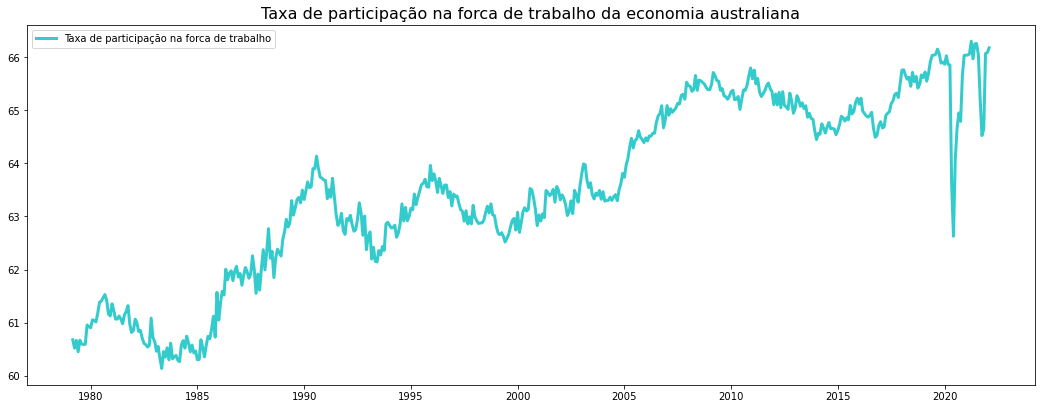

In [29]:
fig = plt.figure(figsize=(14, 5))
line_weight = 3
alpha = .8
ax1 = fig.add_axes([0, 0, 1, 1])
#ax2 = fig.add_axes()
#ax3 = fig.add_axes()

#ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(df['Taxa de participação na forca de trabalho'], color='c', lw=line_weight, alpha=alpha, label='Taxa de participação na forca de trabalho')

leg = lns1
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='upper left')

plt.title('Taxa de participação na forca de trabalho da economia australiana', fontsize=16)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

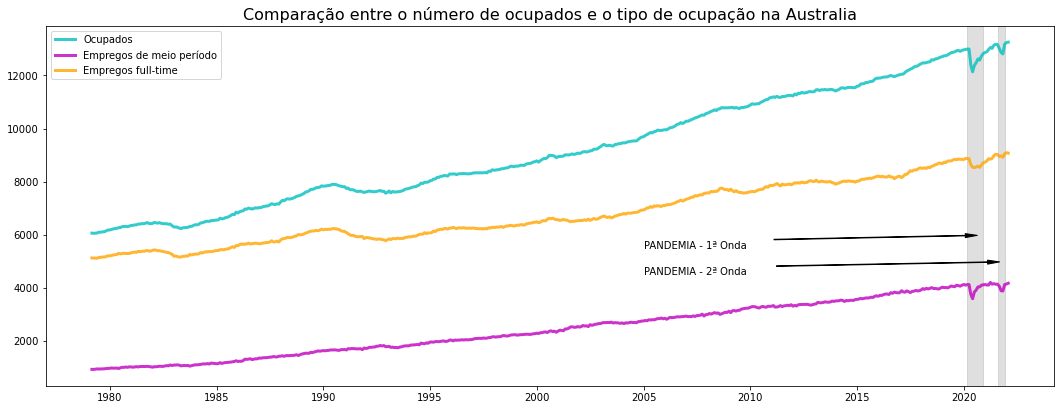

In [38]:
fig = plt.figure(figsize=(14, 5))
line_weight = 3
alpha = .8
ax1 = fig.add_axes([0, 0, 1, 1])
#ax2 = fig.add_axes()
#ax3 = fig.add_axes()

#ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(df['Ocupados'], color='c', lw=line_weight, alpha=alpha, label='Ocupados')
lns2 = ax1.plot(df['Empregos meio período'], color='m', lw=line_weight, alpha=alpha, label='Empregos de meio período')
lns3 = ax1.plot(df['Empregos full-time'], color='orange', lw=line_weight, alpha=alpha, label='Empregos full-time')


plt.axvspan(pd.to_datetime('2020-03-01'),pd.to_datetime('2020-12-01'), color='gray', alpha=0.25)
plt.axvspan(pd.to_datetime('2021-08-01'),pd.to_datetime('2021-12-01'), color='gray', alpha=0.25)

# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETA 
ax1.annotate(
    "PANDEMIA - 1ª Onda", xy=(pd.to_datetime('2021-11-01'), 6000),
    xytext=(pd.to_datetime('2005-01-01'), 5500),
    arrowprops=arrow_properties)

# 2 SETA 
ax1.annotate(
    "PANDEMIA - 2ª Onda", xy=(pd.to_datetime('2022-12-30'), 5000),
    xytext=(pd.to_datetime('2005-01-01'), 4500),
    arrowprops=arrow_properties)



leg = lns1 + lns2 + lns3
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='upper left')

plt.title('Comparação entre o número de ocupados e o tipo de ocupação na Australia', fontsize=16)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

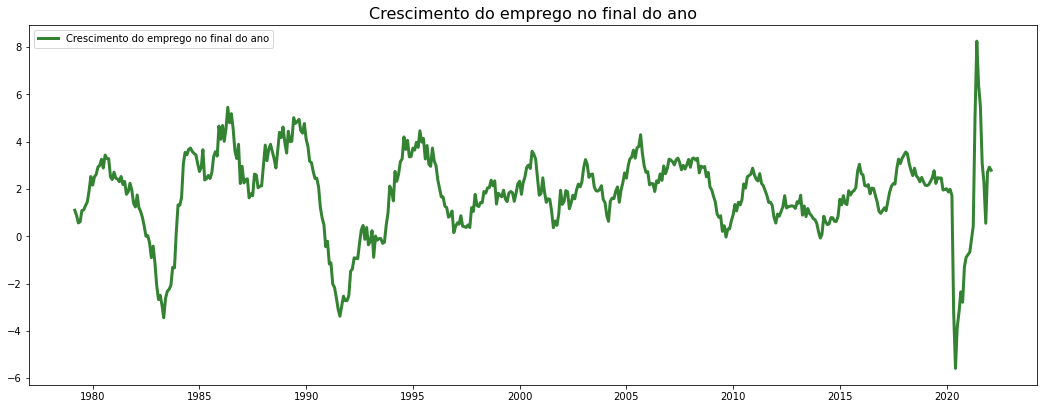

In [37]:
fig = plt.figure(figsize=(14, 5))
line_weight = 3
alpha = .8
ax1 = fig.add_axes([0, 0, 1, 1])
#ax2 = fig.add_axes()
#ax3 = fig.add_axes()

#ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(df['Crescimento do emprego no final do ano'], color='darkgreen', lw=line_weight, alpha=alpha, label='Crescimento do emprego no final do ano')

leg = lns1
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='upper left')

plt.title('Crescimento do emprego no final do ano', fontsize=16)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

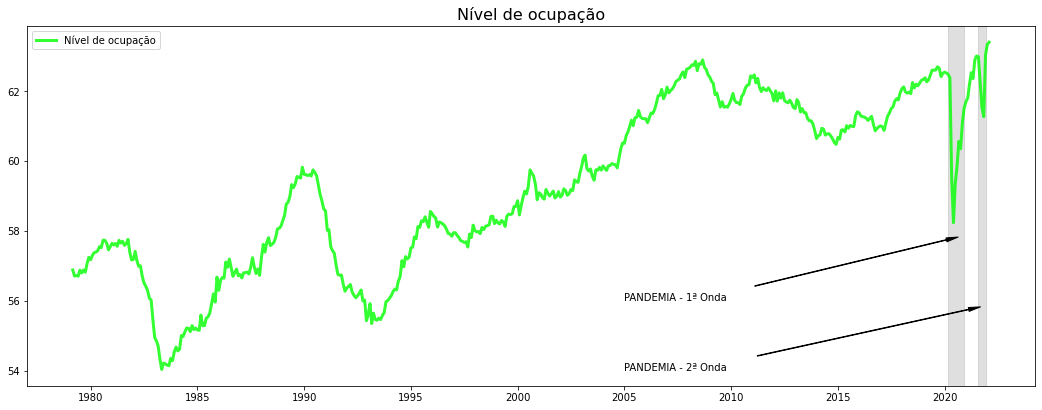

In [46]:
fig = plt.figure(figsize=(14, 5))
line_weight = 3
alpha = .8
ax1 = fig.add_axes([0, 0, 1, 1])
#ax2 = fig.add_axes()
#ax3 = fig.add_axes()

#ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(df['Nível de ocupação'], color='lime', lw=line_weight, alpha=alpha, label='Nível de ocupação')


plt.axvspan(pd.to_datetime('2020-03-01'),pd.to_datetime('2020-12-01'), color='gray', alpha=0.25)
plt.axvspan(pd.to_datetime('2021-08-01'),pd.to_datetime('2021-12-01'), color='gray', alpha=0.25)

# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETA 
ax1.annotate(
    "PANDEMIA - 1ª Onda", xy=(pd.to_datetime('2021-11-01'), 58),
    xytext=(pd.to_datetime('2005-01-01'), 56),
    arrowprops=arrow_properties)

# 2 SETA 
ax1.annotate(
    "PANDEMIA - 2ª Onda", xy=(pd.to_datetime('2022-12-30'), 56),
    xytext=(pd.to_datetime('2005-01-01'), 54),
    arrowprops=arrow_properties)



leg = lns1
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='upper left')

plt.title('Nível de ocupação', fontsize=16)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

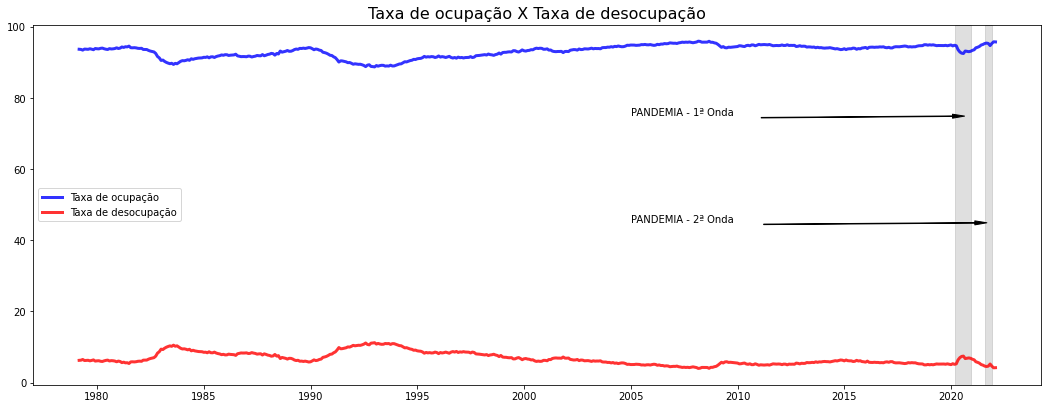

In [55]:
fig = plt.figure(figsize=(14, 5))
line_weight = 3
alpha = .8
ax1 = fig.add_axes([0, 0, 1, 1])
#ax2 = fig.add_axes()
#ax3 = fig.add_axes()

#ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(df['Taxa de ocupação'], color='blue', lw=line_weight, alpha=alpha, label='Taxa de ocupação')
lns2 = ax1.plot(df['Taxa de desocupação'], color='red', lw=line_weight, alpha=alpha, label='Taxa de desocupação')


plt.axvspan(pd.to_datetime('2020-03-01'),pd.to_datetime('2020-12-01'), color='gray', alpha=0.25)
plt.axvspan(pd.to_datetime('2021-08-01'),pd.to_datetime('2021-12-01'), color='gray', alpha=0.25)

# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETA 
ax1.annotate(
    "PANDEMIA - 1ª Onda", xy=(pd.to_datetime('2021-11-01'), 75),
    xytext=(pd.to_datetime('2005-01-01'), 75),
    arrowprops=arrow_properties)

# 2 SETA 
ax1.annotate(
    "PANDEMIA - 2ª Onda", xy=(pd.to_datetime('2022-12-30'), 45),
    xytext=(pd.to_datetime('2005-01-01'), 45),
    arrowprops=arrow_properties)



leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best')

plt.title('Taxa de ocupação X Taxa de desocupação', fontsize=16)

plt.show